In [1]:
#Install omdb library
!pip install omdb

#Dependencies
import pandas as pd
import numpy as np
#import os as os
#import csv
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import omdb
import time

from pprint import pprint
from config import omdb_key

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Pulling in Data
csv_path = "Craig_portion/Resources/tmdb_5000_credits.csv"
csv_path2 = "Craig_portion/Resources/tmdb_5000_movies.csv"
actors = pd.read_csv(csv_path, encoding="utf-8")
movies = pd.read_csv(csv_path2, encoding="utf-8")

In [3]:
#Create df usinf first csv
actors_df = pd.read_csv(csv_path)
actors_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#Create another df using second csv
movies_df = pd.DataFrame(movies)
movies_df=movies_df.rename(columns={"overview": "Overview", "vote_average":"Average Vote", "title":"Title", "revenue":"Revenue", "budget":"Budget"})
#converting money to today's money

movies_df.head()

,Budget,genres,homepage,id,keywords,original_language,original_title,Overview,popularity,production_companies,production_countries,release_date,Revenue,runtime,spoken_languages,status,tagline,Title,Average Vote,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Historical Movie Data
-  Because of the significant number of movies released over time, data must be grouped by time period 

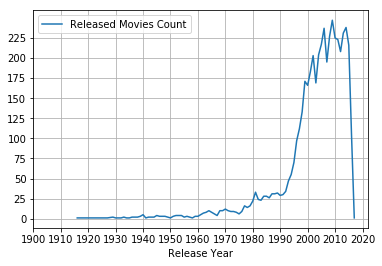

In [5]:
# Add column Release Year
movies_df['Release Year']=movies_df['release_date'].str[:4].astype(float)
movies_count_by_year=movies_df.groupby(by="Release Year")["Title"].count().reset_index().rename(columns={"Title":"Released Movies Count"})
movies_count_by_year.plot(x="Release Year",y="Released Movies Count")
plt.grid(axis="both")
plt.xticks(np.arange(1900,2021,10))
plt.yticks(np.arange(0,250,25))
plt.show()

In [6]:

year_buckets=[1940,1960,1995]
movie_year_bucket=[]
movie_year_bucket_no=[]

for index,row in movies_df.iterrows():
    if row["Release Year"]<year_buckets[0]:
        movie_year_bucket.append("Before "+str(year_buckets[0]))
        movie_year_bucket_no.append(1)
    elif row["Release Year"]>=year_buckets[-1]:
        movie_year_bucket.append("On or after "+str(year_buckets[-1]))
        movie_year_bucket_no.append(len(year_buckets)+1)
    else:
        ok=False
        for i in range(len(year_buckets)-1):
            if(year_buckets[i]<=row["Release Year"]<year_buckets[i+1]):
                movie_year_bucket.append(str(year_buckets[i])+" to "+str(year_buckets[i+1]))
                movie_year_bucket_no.append(i+2)                
                ok=True
        if(ok==False):
            movie_year_bucket.append("undefined")
            movie_year_bucket_no.append(0)
            

movies_df["Years"]=movie_year_bucket
movies_df["Release Years Bucket"]=movie_year_bucket_no

In [7]:
movies_money_df=movies_df.loc[(movies_df["Average Vote"]>0) & (movies_df["Budget"]>0)& (movies_df["Revenue"]>0),["Title","Release Year", "Years", "Release Years Bucket", "Budget","Revenue","Average Vote"]]
# cteate a column with present day money value for Revenue
for index,row in movies_money_df.iterrows():
   movies_money_df.at[index,"Revenue Adjusted"]=row["Revenue"]*(math.exp(0.03*(2017-row["Release Year"])))
   movies_money_df.at[index,"Budget Adjusted"]=row["Budget"]*(math.exp(0.03*(2017-row["Release Year"])))

# Revenues
-  Because of large difference in revenues, we break down movies into revenue buckets. Revenues were adjusted to current money value at inflation rate of 3% per year.

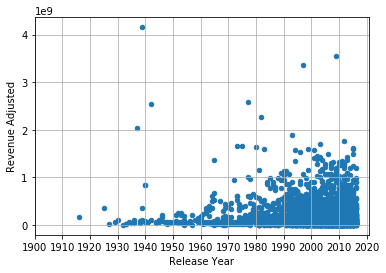

In [8]:
movies_money_df.plot(x="Release Year",y="Revenue Adjusted",kind="scatter",subplots=True)
plt.grid(axis="both")
plt.xticks(np.arange(1900,2021,10))
#plt.yticks(np.arange(0,5000000001,1000000000))

plt.show()

Movies with higest revenues are listed below. The explanationn for revenues of "Gone with the Wind" and "Bambi" movies is an open question due to limited information on the dataset used. One possible explanationn is the cumulative revenue over time since 30s-40s due to popularity of these movies.

In [9]:
# adj_revenue_mean=np.mean(movies_money_df["Revenue Adjusted"])
# adj_revenue_std=np.std(movies_money_df["Revenue Adjusted"])
movies_money_df.sort_values(["Revenue Adjusted"],ascending=[False],inplace=True)
movies_money_df[movies_money_df["Revenue Adjusted"]>2000000000]

,Title,Release Year,Years,Release Years Bucket,Budget,Revenue,Average Vote,Revenue Adjusted,Budget Adjusted
3813,Gone with the Wind,1939.0,Before 1940,1,4000000,400176459,7.7,4.154326e+09,4.152495e+07
0,Avatar,2009.0,On or after 1995,4,237000000,2787965087,7.2,3.544198e+09,3.012860e+08
25,Titanic,1997.0,On or after 1995,4,200000000,1845034188,7.5,3.361871e+09,3.644238e+08
2912,Star Wars,1977.0,1960 to 1995,3,11000000,775398007,8.1,2.574412e+09,3.652129e+07
4441,Bambi,1942.0,1940 to 1960,2,858000,267447150,6.8,2.537468e+09,8.140477e+06
2967,E.T. the Extra-Terrestrial,1982.0,1960 to 1995,3,10500000,792910554,7.3,2.265862e+09,3.000534e+07
4259,Snow White and the Seven Dwarfs,1937.0,Before 1940,1,1488423,184925486,6.9,2.038466e+09,1.640715e+07


In [10]:
revenue_buckets=[100000,10000000,1000000000]
revenue_bucket=[]
revenue_bucket_no=[]

for index,row in movies_money_df.iterrows():
    if row["Revenue Adjusted"]<revenue_buckets[0]:
        revenue_bucket.append("Under "+str(revenue_buckets[0]))
        revenue_bucket_no.append(1)
    elif row["Revenue Adjusted"]>=revenue_buckets[-1]:
        revenue_bucket.append("Above "+str(revenue_buckets[-1]))
        revenue_bucket_no.append(len(revenue_buckets)+1)
    else:
        ok=False
        for i in range(len(year_buckets)-1):
            if(revenue_buckets[i]<=row["Revenue Adjusted"]<revenue_buckets[i+1]):
                revenue_bucket.append(str(revenue_buckets[i])+" to "+str(revenue_buckets[i+1]))
                revenue_bucket_no.append(i+2)
                ok=True
        if(ok==False):
            revenue_bucket.append("undefined")
            revenue_bucket_no.append(0)
            

movies_money_df["Revenue Tier"]=revenue_bucket
movies_money_df["Revenue Tier No"]=revenue_bucket_no

# Revenues by release year and revenue tiers

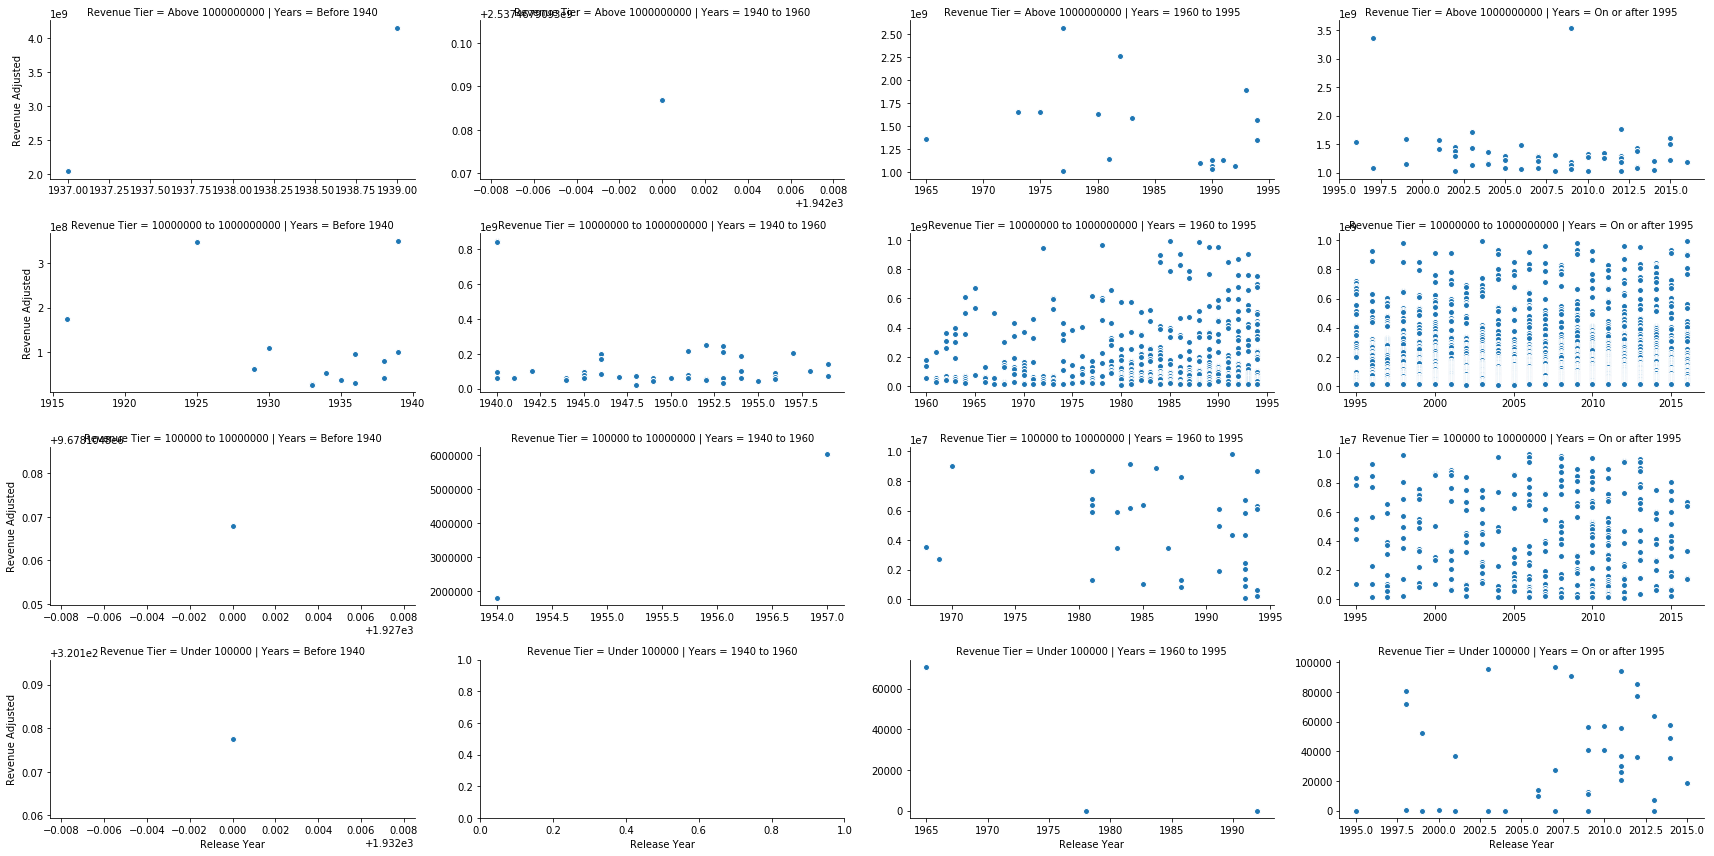

In [11]:
#movies_money_df.groupby(['Release Years', 'Release Year', 'Revenue Adjusted']).agg('count').unstack(0).plot(kind='scatter', subplots=True)
movies_money_df.sort_values(["Revenue Tier No", "Release Years Bucket"],ascending=[False, True],inplace=True)
g = sns.FacetGrid(movies_money_df, row="Revenue Tier", col="Years", sharex=False, sharey=False, size=3,aspect=2)
g = g.map(plt.scatter, 'Release Year', 'Revenue Adjusted', edgecolor="w")

In [12]:
movies_df["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

# Relationship between movie budget and movie rating

Budget is shown in today's money adjusted to 3% inflation. Ass seen fromm the plots, budgets are not the detrminig factor for movie rating. In some cases high budgets did not ensure high rating.

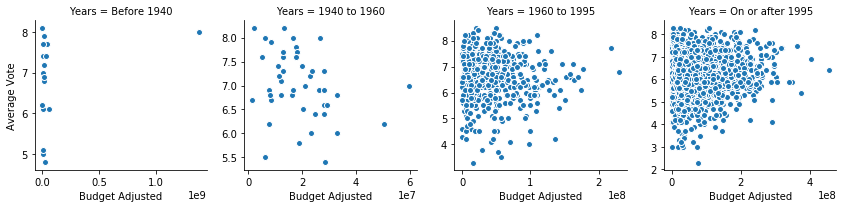

In [13]:
#movies_money_df.groupby(['Release Years', 'Release Year', 'Revenue Adjusted']).agg('count').unstack(0).plot(kind='scatter', subplots=True)
movies_money_df.sort_values(["Release Years Bucket"],ascending=[True],inplace=True)
g = sns.FacetGrid(movies_money_df, col="Years", sharex=False, sharey=False, size=3,aspect=1)
g = g.map(plt.scatter, 'Budget Adjusted', 'Average Vote', edgecolor="w")

In [14]:
#Create dataframe with movie actors - first 3 for each movie

for index,row in actors_df.iterrows():
    given_movies_actor_value=eval(row['cast'])
    given_movie_actors_df = pd.DataFrame(given_movies_actor_value)
    given_movie_actors_df["Title"]=row['title']
    try:
        given_movie_actors_df.drop(axis=1,columns=['cast_id','character','credit_id','gender','id','order'],inplace=True)
    except:
        pass
    
    if(index==0):
        movie_actor_df=given_movie_actors_df.iloc[0:3]
    else:
        movie_actor_df=movie_actor_df.append(given_movie_actors_df.iloc[0:3])

movie_actor_df.rename(columns={"name":"Actor"},inplace=True)   
movie_actor_df.head()

,Title,Actor
0,Avatar,Sam Worthington
1,Avatar,Zoe Saldana
2,Avatar,Sigourney Weaver
0,Pirates of the Caribbean: At World's End,Johnny Depp
1,Pirates of the Caribbean: At World's End,Orlando Bloom


In [15]:
# add max avg revenue of prior movies by actor (first 3 in the cast), as a measure of prior popularity of the actors starring
movie_max_avg_rev_by_actor=[]
for index,row in movies_money_df.iterrows():
    curr_movie_actors_df=movie_actor_df.loc[movie_actor_df['Title']==row['Title']]
    curr_movie_actors_all_movies_df=pd.DataFrame.merge(curr_movie_actors_df,movie_actor_df,on='Actor')
    prior_movies_df=movies_money_df.loc[movies_money_df['Release Year']<row['Release Year']]
    curr_movie_actors_all_prior_movies_df=pd.DataFrame.merge(curr_movie_actors_all_movies_df,prior_movies_df,left_on="Title_y", right_on="Title")

    curr_movie_actors_all_prior_movies_before_gr_ser=curr_movie_actors_all_prior_movies_df.groupby(by="Actor").mean()
    try:
        max_actor_avg_prior_rev=max(curr_movie_actors_all_prior_movies_before_gr_ser["Revenue Adjusted"])
        movie_max_avg_rev_by_actor.append(max_actor_avg_prior_rev)
    except:
        movie_max_avg_rev_by_actor.append(0)

se = pd.Series(movie_max_avg_rev_by_actor)
movies_money_df['Starring Actors Popularity'] = se.values

# Relationship between prior popularity of starring actors and movies' revenues

As a measure of actor's popularity, we used the maximum avg revenue of movies in which each of starring actors (first 3 inn the cast) were starring previously (first 3 in the cast). We can see that actor's popularity is not a detrmining factor for movie success.

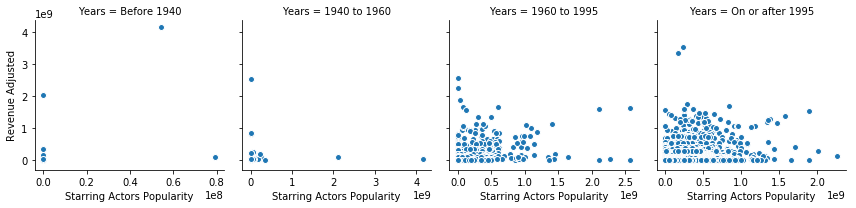

In [16]:
movies_money_df.sort_values("Release Years Bucket",ascending=[True],inplace=True)
g = sns.FacetGrid(movies_money_df, col="Years", sharex=False, sharey=True, size=3)
g = g.map(plt.scatter, "Starring Actors Popularity", "Revenue Adjusted", edgecolor="w")
plt.show()

In [17]:
movie_actor_df.dropna(inplace=True)
movie_actor_df.describe()

,Title,Actor
count,14250,14250
unique,4757,5687
top,The Host,Robert De Niro
freq,6,46


In [18]:
# create datafarme with movies-genres

for index,row in movies_df.iterrows():
    given_movies_genre_value=eval(row['genres'])
    given_movie_genres_df = pd.DataFrame(given_movies_genre_value)
    given_movie_genres_df["Title"]=row['Title']
    try:
        given_movie_genres_df.drop(axis=1,columns=['id'],inplace=True)
    except:
        pass
    
    if(index==0):
        movie_genre_df=given_movie_genres_df
    else:
        movie_genre_df=movie_genre_df.append(given_movie_genres_df)

movie_genre_df.rename(columns={"name":"Genre"},inplace=True)   
movie_genre_df.head()

,Title,Genre
0,Avatar,Action
1,Avatar,Adventure
2,Avatar,Fantasy
3,Avatar,Science Fiction
0,Pirates of the Caribbean: At World's End,Adventure


In [19]:
movie_genre_df.dropna(inplace=True)                                                   
movie_genre_df.describe()

,Title,Genre
count,12160,12160
unique,4772,20
top,The Host,Drama
freq,8,2297


In [20]:
genres_list={"Mood":['Comedy','Thriller','Horror','Drama','Action','Fantasy','Mystery'],
"Concept":['Crime','Science Fiction','Family','Romance','Adventure','Western','War','History']}
movie_genre_df["Genre"].value_counts()
genres_list_all=movie_genre_df["Genre"].unique()
genres_list_all

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [21]:
actor_genres_df=pd.DataFrame.merge(movie_actor_df,movie_genre_df, on="Title")
actor_genres_df.dropna(inplace=True)
actor_genres_df.head()

,Title,Actor,Genre
0,Avatar,Sam Worthington,Action
1,Avatar,Sam Worthington,Adventure
2,Avatar,Sam Worthington,Fantasy
3,Avatar,Sam Worthington,Science Fiction
4,Avatar,Zoe Saldana,Action


In [22]:
actor_genres_counts=actor_genres_df.groupby(by=["Actor","Genre"]).count()
actor_genres_counts.rename(columns={"Title":"Movies Count"},inplace=True)
actor_genres_counts.reset_index(inplace=True)
actor_genres_counts.head()

,Actor,Genre,Movies Count
0,"""Weird Al"" Yankovic",Comedy,1
1,50 Cent,Action,1
2,50 Cent,Crime,1
3,50 Cent,Drama,2
4,50 Cent,Thriller,1


# Actors starred most, by movie genre

In [23]:
actors_name=[]
actors_genre=[]
actors_genre_count=[]

for genre in genres_list_all:
    given_genre_actors=actor_genres_counts.loc[actor_genres_counts["Genre"]==genre]
    given_genre_actors_max=given_genre_actors.loc[given_genre_actors["Movies Count"].idxmax()]
    actors_genre.append(genre)
    actors_name.append(given_genre_actors_max["Actor"])
    actors_genre_count.append(given_genre_actors_max["Movies Count"])


actors_genre_top_df=pd.DataFrame.from_dict({'Actor': actors_name, 'Genre': actors_genre, 'Count': actors_genre_count})
actors_genre_top_df.head()

,Actor,Count,Genre
0,Arnold Schwarzenegger,20,Action
1,Sean Connery,16,Adventure
2,Johnny Depp,11,Fantasy
3,Hugh Jackman,9,Science Fiction
4,Robert De Niro,17,Crime


# Actor Deep Dive

In [24]:
#Clean up df headers
actors.columns = ['ID', 'Title', 'Cast', 'Crew']

In [25]:
#Create input option for actor name
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Harrison Ford


In [26]:
#Display number of movies acted in
selected_actor = actors[actors['Cast'].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Harrison Ford has been in 32 movies


In [27]:
#Display list of movies acted in
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["Title"])
movies_played_in

Harrison Ford has been in the following movies


,Title
0,Indiana Jones and the Kingdom of the Crystal S...
1,Ender's Game
2,The Expendables 3
3,What Lies Beneath
4,The Devil's Own
5,K-19: The Widowmaker
6,Air Force One
7,Six Days Seven Nights
8,Hollywood Homicide
9,Random Hearts


In [28]:
#Create empty df
movies_played_in["Year Released"] = ""
movies_played_in["Rated"] = ""
movies_played_in["Rotten Tomato"] = ""
movies_played_in["Meta Score"] = ""
movies_played_in["Plot Sentiment"] = ""
movies_played_in["Plot"] = ""
movies_played_in["Genre"] = ""
movies_played_in.head()

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre
0,Indiana Jones and the Kingdom of the Crystal S...,,,,,,,
1,Ender's Game,,,,,,,
2,The Expendables 3,,,,,,,
3,What Lies Beneath,,,,,,,
4,The Devil's Own,,,,,,,


In [29]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

#Loop through df
for index, row in movies_played_in.iterrows():
    movie_pull = row["Title"]
         
    
    try:
        url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_pull, omdb_key)
        
        #Print log of movie being processed
        print(f"Now retrieving Movie Data for: " + movie_pull)
       
        #Run requests to API
        movie_data = requests.get(url).json()
        pprint(movie_data)
        
        #Defining variables
        RT = movie_data["Ratings"][1]["Value"]
        Meta = movie_data["Metascore"]
        Year = movie_data["Year"]
        Rated = movie_data["Rated"]
        Plot = movie_data["Plot"]
        Sent = analyzer.polarity_scores(Plot)["compound"]
        Genre = movie_data["Genre"]
        
        #Add to df
        movies_played_in.set_value(index, "Rated", Rated)
        movies_played_in.set_value(index, "Year Released", Year)
        movies_played_in.set_value(index, "Rotten Tomato", RT)
        movies_played_in.set_value(index, "Meta Score", Meta)
        movies_played_in.set_value(index, "Plot", Plot)
        movies_played_in.set_value(index, "Plot Sentiment", Sent)
        movies_played_in.set_value(index, "Genre", Genre)
        
    except:
        movies_played_in.set_value(index, "Year Released", "N/A")
        movies_played_in.set_value(index, "Rated,", "N/A")
        movies_played_in.set_value(index, "Rotten Tomato", "N/A")
        movies_played_in.set_value(index, "Meta Score", "N/A")
        movies_played_in.set_value(index, "Plot Sentiment", "N/A")
        movies_played_in.set_value(index, "Plot", "N/A")
        movies_played_in.set_value(index, "Genre", "N/A")
        
#Display last movie json    
pprint(movie_data)

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Indiana Jones and the Kingdom of the Crystal Skull
{'Actors': 'Harrison Ford, Cate Blanchett, Karen Allen, Shia LaBeouf',
 'Awards': 'Nominated for 1 BAFTA Film Award. Another 10 wins & 35 '
           'nominations.',
 'BoxOffice': '$316,957,122',
 'Country': 'USA',
 'DVD': '14 Oct 2008',
 'Director': 'Steven Spielberg',
 'Genre': 'Action, Adventure, Fantasy',
 'Language': 'English, German, Russian',
 'Metascore': '65',
 'Plot': 'Famed archaeologist and adventurer Dr. Henry "Indiana" Jones, Jr. is '
         'called back into action, when he becomes entangled in a Soviet plot '
         'to uncover the secret behind mysterious artifacts known as the '
         'Crystal Skulls.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTIxNDUxNzcyMl5BMl5BanBnXkFtZTcwNTgwOTI3MQ@@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 

C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future rele

{'Actors': 'Sylvester Stallone, Jason Statham, Harrison Ford, Arnold '
           'Schwarzenegger',
 'Awards': '2 wins & 5 nominations.',
 'BoxOffice': '$34,742,878',
 'Country': 'USA, France, Bulgaria',
 'DVD': '25 Nov 2014',
 'Director': 'Patrick Hughes',
 'Genre': 'Action, Adventure, Thriller',
 'Language': 'English, Romanian, Spanish',
 'Metascore': '35',
 'Plot': 'Barney augments his team with new blood for a personal battle: to '
         'take down Conrad Stonebanks, the Expendables co-founder and '
         'notorious arms trader who is hell bent on wiping out Barney and '
         'every single one of his associates.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BODU5ODMyMzg2MV5BMl5BanBnXkFtZTgwMTA2MTcxMjE@._V1_SX300.jpg',
 'Production': 'Lionsgate Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.1/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '32%'},
             {'Source': 'Metacritic', 'Value': '35/100'}],
 'Rele

{'Actors': 'Harrison Ford, Kristin Scott Thomas, Charles S. Dutton, Bonnie '
           'Hunt',
 'Awards': 'N/A',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '30 Oct 2001',
 'Director': 'Sydney Pollack',
 'Genre': 'Drama, Mystery, Romance',
 'Language': 'English',
 'Metascore': '38',
 'Plot': 'A police sergeant and a congresswoman both lose their spouses in a '
         'plane crash, and they soon discover that their spouses were having '
         'an affair with each other.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BYWM1YmRkOWEtNDcyNS00ODE2LTkwNDAtOTA3OTA4ZTVlZTIwL2ltYWdlXkEyXkFqcGdeQXVyNTM3MDMyMDQ@._V1_SX300.jpg',
 'Production': 'Columbia Pictures',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.1/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '15%'},
             {'Source': 'Metacritic', 'Value': '38/100'}],
 'Released': '08 Oct 1999',
 'Response': 'True',
 'Runtime': '133 min',
 'Title': 'Random Hearts',
 'Type': 'movie',
 'We

{'Actors': 'Sacha Baron Cohen, Gustaf Hammarsten, Clifford Bañagale, Chibundu '
           'Orukwowu',
 'Awards': '2 wins & 5 nominations.',
 'BoxOffice': '$59,992,760',
 'Country': 'USA, UK',
 'DVD': '17 Nov 2009',
 'Director': 'Larry Charles',
 'Genre': 'Comedy',
 'Language': 'English, German',
 'Metascore': '54',
 'Plot': 'Flamboyant and gay Austrian Brüno looks for new fame in America.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTUwNDIwNDE5MV5BMl5BanBnXkFtZTcwMDA2MzA1Mg@@._V1_SX300.jpg',
 'Production': 'Universal Pictures',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.8/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '67%'},
             {'Source': 'Metacritic', 'Value': '54/100'}],
 'Released': '10 Jul 2009',
 'Response': 'True',
 'Runtime': '81 min',
 'Title': 'Brüno',
 'Type': 'movie',
 'Website': 'http://www.meinspace.com/bruno',
 'Writer': 'Sacha Baron Cohen (screenplay), Anthony Hines (screenplay), Dan '
           'Mazer (

{'Actors': 'Harrison Ford, Kate Capshaw, Jonathan Ke Quan, Amrish Puri',
 'Awards': 'Won 1 Oscar. Another 8 wins & 21 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '21 Oct 2003',
 'Director': 'Steven Spielberg',
 'Genre': 'Action, Adventure',
 'Language': 'English, Sinhalese',
 'Metascore': '57',
 'Plot': 'After arriving in India, Indiana Jones is asked by a desperate '
         'village to find a mystical stone. He agrees, and stumbles upon a '
         'secret cult plotting a terrible plan in the catacombs of an ancient '
         'palace.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTMyNzI4OTA5OV5BMl5BanBnXkFtZTcwMDQ2MjAxNA@@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.6/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '85%'},
             {'Source': 'Metacritic', 'Value': '57/100'}],
 'Released': '23 May 1984',
 'Response': 'True',
 'Runtime': '11

In [30]:
#Format and display
movies_played_in.sort_values(["Year Released"], ascending=True, inplace=True)
movies_played_in = movies_played_in.reset_index(drop=True)
movies_played_in.head()

,Title,Year Released,Rated,Rotten Tomato,Meta Score,Plot Sentiment,Plot,Genre
0,American Graffiti,1973,PG,95%,97,0,A couple of high school grads spend one final ...,"Comedy, Drama"
1,The Conversation,1974,PG,98%,86,-0.9169,"A paranoid, secretive surveillance expert has ...","Drama, Mystery, Thriller"
2,Star Wars,1977,PG,93%,90,0.1531,Luke Skywalker joins forces with a Jedi Knight...,"Action, Adventure, Fantasy"
3,Force 10 from Navarone,1978,PG,64%,42,-0.8658,"During World War II, several oddly assorted mi...","Action, Drama, War"
4,Apocalypse Now,1979,R,96%,94,-0.7096,"During the Vietnam War, Captain Willard is sen...","Drama, War"


In [31]:
#Replace inconsistent data
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('%','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('/100','')
movies_played_in['Rotten Tomato'] = movies_played_in['Rotten Tomato'].str.replace('N/A','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('%','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('NaN','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('/100','')
movies_played_in['Meta Score'] = movies_played_in['Meta Score'].str.replace('N/A','')
movies_played_in['Year Released'] = movies_played_in['Year Released'].str.replace('N/A','')

In [32]:
#Converting string values to numerics
movies_played_in["Meta Score"] = pd.to_numeric(movies_played_in["Meta Score"])
movies_played_in['Rotten Tomato'] = pd.to_numeric(movies_played_in['Rotten Tomato'])
movies_played_in['Plot Sentiment'] = pd.to_numeric(movies_played_in['Plot Sentiment'])
movies_played_in['Year Released'] = pd.to_numeric(movies_played_in['Year Released'])

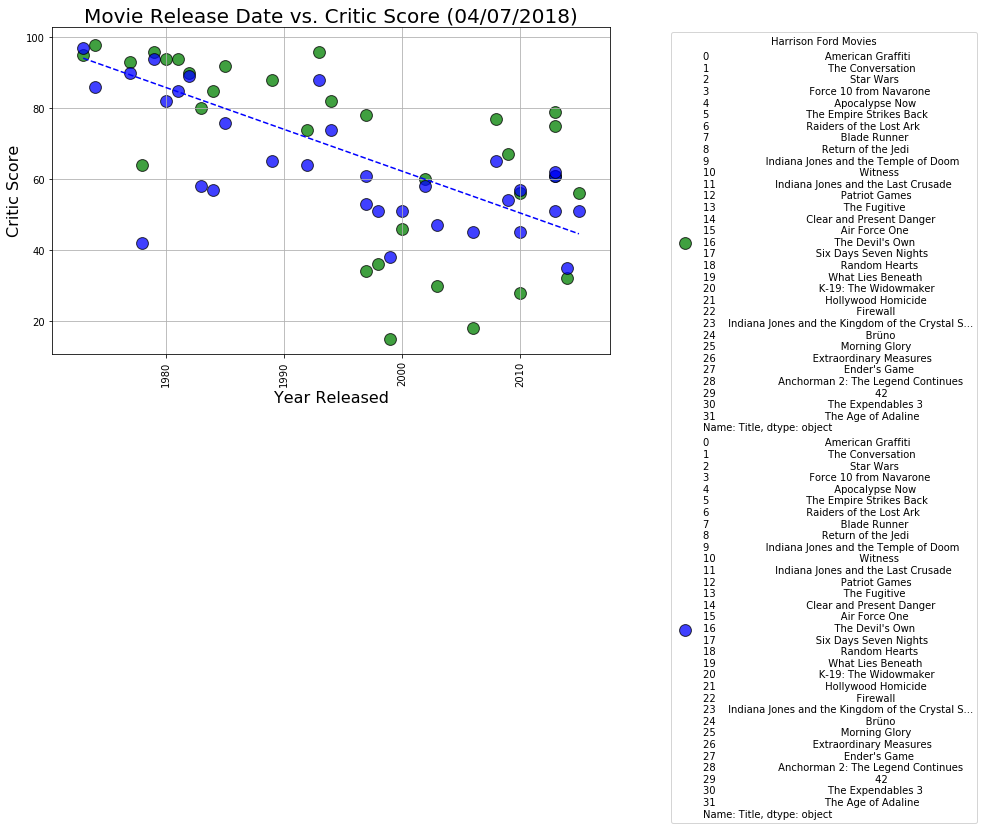

In [41]:
from scipy.stats import linregress
#Set figure size
plt.figure(figsize=(10,6))

#Create Trendline
fake = movies_played_in["Rotten Tomato"]
(slope, intercept, _,_ , _) = linregress(movies_played_in["Year Released"], fake)
fit = slope * movies_played_in["Year Released"] + intercept

#Aesthetics
plt.title("Movie Release Date vs. Critic Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Critic Score", fontsize=16)

#Create scatter plots
plt.scatter(movies_played_in["Year Released"], movies_played_in["Rotten Tomato"], color= "green", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.scatter(movies_played_in["Year Released"], movies_played_in["Meta Score"], color= "Blue", edgecolor= "black",
label= (movies_played_in["Title"]), s=140, alpha = 0.75)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")

#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Critic_Score.png", bbox_inches= "tight")

#Display Trendline
plt.plot(movies_played_in["Year Released"], fit, "b--")

#Display scatter plots
plt.grid()
plt.show()

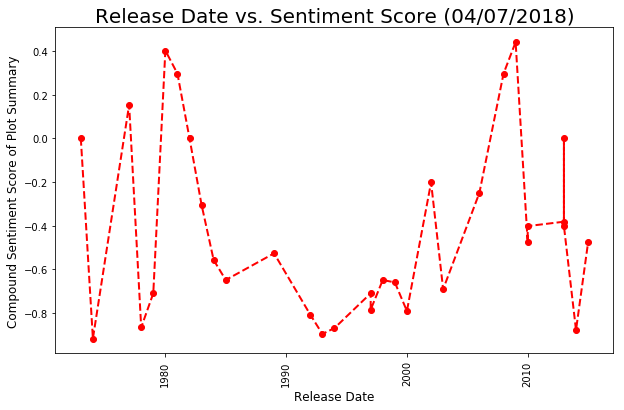

In [34]:
#Set size of bar plots
plt.figure(figsize=(10,6))

#Create line graph
plt.plot(movies_played_in["Year Released"],movies_played_in["Plot Sentiment"], color= "Red", marker= "o", linestyle= "dashed",
linewidth= 2, markersize= 6)

#Aesthetics
plt.title("Release Date vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Release Date", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Compound Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

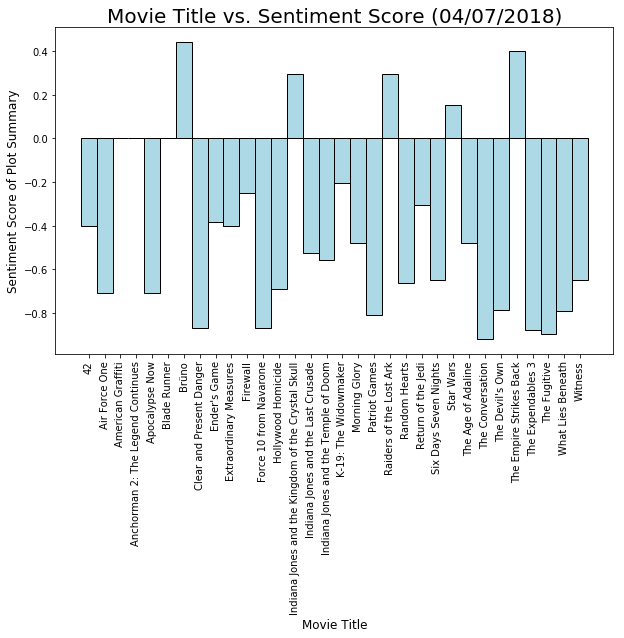

In [35]:
#Set size of bar plots
plt.figure(figsize=(10,6))

#Create bar plots for comparing the results of compound sentiment score for each movie plot
plt.bar(movies_played_in["Title"], movies_played_in["Plot Sentiment"], color= "lightblue", edgecolor= "black", width= 1)

#Aesthetics
plt.title("Movie Title vs. Sentiment Score " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Movie Title", fontsize=12)
plt.xticks(rotation= 90)
plt.ylabel("Sentiment Score of Plot Summary", fontsize=12)


#Save plot as PNG image
plt.savefig("Images/Movie_Title_vs._Sentiment_Score.png", bbox_inches= "tight")

#Display Output
plt.show()

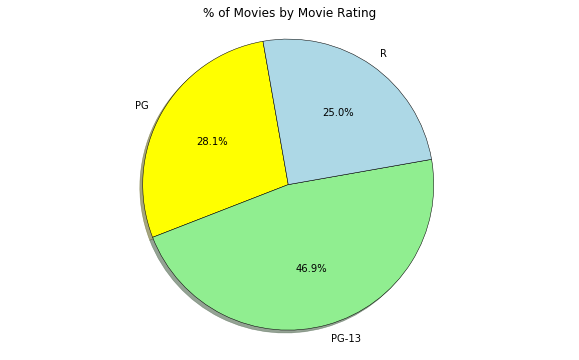

In [36]:
#Set size of pie chart
plt.figure(figsize=(10,6))

#Group "final" dataframe by "Rated"
rating = movies_played_in.groupby("Rated").count()
final_rating = pd.DataFrame(rating)

total_movies = rating["Title"]

#Set pie chart labels
labels = total_movies.index

#Define color and explode values for all pie chart use
colors = ["yellow", "lightgreen", "lightblue", "royalblue"]

#Create pie chart for "% of Total Fares by City Type"
plt.pie(total_movies, startangle = 100, colors = colors, labels = labels,
        autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#Save plot as PNG image
plt.savefig("Images/Percent_of_Movies_by_Rating.png", bbox_inches= "tight")

#Format display
plt.title("% of Movies by Movie Rating")
plt.axis("equal")
plt.show()

In [37]:
#Export DataFrame as CSV
movies_played_in.to_csv("Output/actor_movie_info.csv")